In [1]:
using Echo
using BSON
using Accessors
using Flux
using LinearAlgebra
using Plots
plotlyjs()


┌ Warning: backend `PlotlyJS` is not installed.
└ @ Plots /home/jsanz/.julia/packages/Plots/Pe7wF/src/backends.jl:43


Plots.PlotlyJSBackend()

In [2]:
tab = Echo.LookupTableUtils.ber_lookup_table

Dict{Any, Any} with 5 entries:
  4 => [-10.0 0.440701 … 0.482237 0.923885; -9.8 0.43915 … 0.48151 0.923294; … …
  6 => [-10.0 0.461196 … 0.487189 0.9801; -9.8 0.460019 … 0.486533 0.979901; … …
  2 => [-10.0 0.375843 … 0.469191 0.71828; -9.8 0.373085 … 0.467804 0.716779; ……
  3 => [-10.0 0.416661 … 0.479604 0.856796; -9.8 0.414682 … 0.478422 0.855689; …
  1 => [-10.0 0.327249 … 0.440373 0.440373; -9.8 0.323592 … 0.43774 0.43774; … …

In [3]:
tab[2]

225×5 Matrix{Float64}:
 -10.0  0.375843  0.610497  0.469191  0.71828
  -9.8  0.373085  0.606966  0.467804  0.716779
  -9.6  0.370336  0.603599  0.466321  0.715084
  -9.4  0.367482  0.600047  0.46479   0.713583
  -9.2  0.364469  0.596207  0.463306  0.711931
  -9.0  0.361567  0.592484  0.461551  0.710177
  -8.8  0.358105  0.588038  0.45966   0.708018
  -8.6  0.355057  0.584222  0.457846  0.706078
  -8.4  0.351831  0.579861  0.456085  0.704152
  -8.2  0.348519  0.575488  0.454129  0.70189
   ⋮                                  
  33.2  0.0       0.0       0.0       0.0
  33.4  0.0       0.0       0.0       0.0
  33.6  0.0       0.0       0.0       0.0
  33.8  0.0       0.0       0.0       0.0
  34.0  0.0       0.0       0.0       0.0
  34.2  0.0       0.0       0.0       0.0
  34.4  0.0       0.0       0.0       0.0
  34.6  0.0       0.0       0.0       0.0
  34.8  0.0       0.0       0.0       0.0

In [4]:
get_optimal_BER_roundtrip(8.2, 2)

0.0084949f0

In [5]:
get_optimal_SNR_for_BER_roundtrip(0.01, 2)

8.4f0

In [9]:
new_tbl = BSON.load("new_ber_lookup_table.bson")

Dict{Int64, Matrix{Float32}} with 7 entries:
  4  => [-10.0 0.440844 … 0.48222 0.923968; -9.8 0.439377 … 0.481515 0.923366; …
  6  => [-10.0 0.461019 … 0.486999 0.980074; -9.8 0.460049 … 0.486437 0.979777;…
  2  => [-10.0 0.375878 … 0.469149 0.718076; -9.8 0.37296 … 0.467853 0.716828; …
  10 => [-10.0 0.476788 … 0.491633 0.998687; -9.8 0.476134 … 0.491367 0.998705;…
  8  => [-10.0 0.470964 … 0.489888 0.99489; -9.8 0.470166 … 0.489371 0.994869; …
  3  => [-10.0 0.416639 … 0.479544 0.85689; -9.8 0.414542 … 0.478316 0.855738; …
  1  => [-10.0 0.32752 … 0.440452 0.440452; -9.8 0.323848 … 0.438048 0.438048; …

In [11]:
keys(new_tbl)

KeySet for a Dict{Int64, Matrix{Float32}} with 7 entries. Keys:
  4
  6
  2
  10
  8
  3
  1

BPS 1
BPS 2
BPS 4
BPS 6
BPS 8
BPS 10


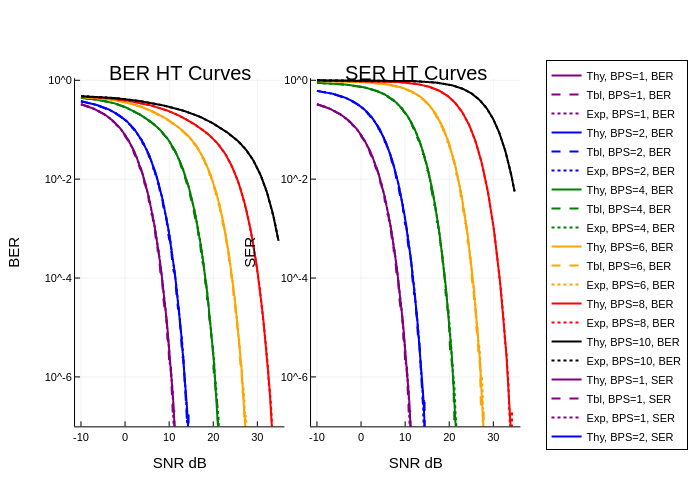

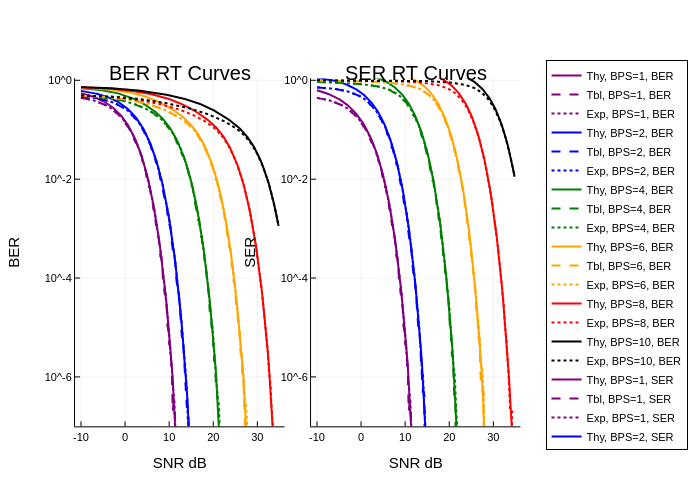

In [14]:
pb = plot(title="BER HT Curves", xlabel="SNR dB", ylabel="BER", yscale=:log)
pbr = plot(title="BER RT Curves", xlabel="SNR dB", ylabel="BER", yscale=:log)
ps = plot(title="SER HT Curves", xlabel="SNR dB", ylabel="SER", yscale=:log)
psr = plot(title="SER RT Curves", xlabel="SNR dB", ylabel="SER", yscale=:log)
SNRs = Float32.(collect(LinRange(-10, 34.8, 225)))
colors = Dict(1 => :purple, 2 => :blue, 4 => :green, 6 => :orange, 8 => :red, 10 => :black)
for bps in [1,2,4,6,8,10]
    println("BPS $bps")
    pb_th = [predict_classic_ber(bps, Float32(snr)) for snr in SNRs]
    pb_th_rt = [predict_classic_ber_roundtrip(bps, Float32(snr)) for snr in SNRs]
    ps_th = [predict_classic_ser(bps, Float32(snr)) for snr in SNRs]
    ps_th_rt = [predict_classic_ser_roundtrip(bps, Float32(snr)) for snr in SNRs]
    plot!(pb, SNRs, pb_th, label="Thy, BPS=$bps, BER", color=colors[bps], linewidth=2)
    plot!(pbr, SNRs, pb_th_rt, label="Thy, BPS=$bps, BER", color=colors[bps], linewidth=2)
    plot!(ps, SNRs, ps_th, label="Thy, BPS=$bps, SER", color=colors[bps], linewidth=2)
    plot!(psr, SNRs, ps_th_rt, label="Thy, BPS=$bps, SER", color=colors[bps], linewidth=2)
    if bps <= 6
        pb_tbl = [get_optimal_BER(snr, bps) for snr in SNRs]
        pb_tbl_rt = [get_optimal_BER_roundtrip(snr, bps) for snr in SNRs]
        ps_tbl = [get_optimal_SER(snr, bps) for snr in SNRs]
        ps_tbl_rt = [get_optimal_SER_roundtrip(snr, bps) for snr in SNRs]
        plot!(pb, SNRs, pb_tbl, linestyle=:dash, label="Tbl, BPS=$bps, BER", color=colors[bps], linewidth=2)
        plot!(pbr, SNRs, pb_tbl_rt, linestyle=:dash, label="Tbl, BPS=$bps, BER", color=colors[bps], linewidth=2)
        plot!(ps, SNRs, ps_tbl, linestyle=:dash, label="Tbl, BPS=$bps, SER", color=colors[bps], linewidth=2)
        plot!(psr, SNRs, ps_tbl_rt, linestyle=:dash, label="Tbl, BPS=$bps, SER", color=colors[bps], linewidth=2)
    end
    pb_ex_ht = new_tbl[bps][:, 2]
    ps_ex_ht = new_tbl[bps][:, 3]
    pb_ex_rt = new_tbl[bps][:, 4]
    ps_ex_rt = new_tbl[bps][:, 5]
    plot!(pb, SNRs, pb_ex_ht, linestyle=:dot, label="Exp, BPS=$bps, BER", color=colors[bps], linewidth=2)
    plot!(pbr, SNRs, pb_ex_rt, linestyle=:dot, label="Exp, BPS=$bps, BER", color=colors[bps], linewidth=2)
    plot!(ps, SNRs, ps_ex_ht, linestyle=:dot, label="Exp, BPS=$bps, SER", color=colors[bps], linewidth=2)
    plot!(psr, SNRs, ps_ex_rt, linestyle=:dot, label="Exp, BPS=$bps, SER", color=colors[bps], linewidth=2)
end

plot!(pb, ylim=[1e-7, 1.1])
plot!(pbr, ylim=[1e-7, 1.1])
plot!(ps, ylim=[1e-7, 1.1])
plot!(psr, ylim=[1e-7, 1.1])

display(plot(pb, ps, layout=(1, 2), size=(1200, 500), legend=:outertopright))
display(plot(pbr, psr, layout=(1, 2), size=(1200, 500), legend=:outertopright))